# NBA Combine and Draft 

Author: Omar Diakhate

For this project, I have chosen to use two NBA datasets. The first dataset on the NBA Draft Combine (NBA_combine.csv), an annual showcase for basketball players held in May, shortly before the NBA Draft where athletes are invited to display their skills, and participants are measured on both intangibles as well as physical abilities. This dataset consists of all anthropometric, strength, and agility measurements, as well as additional metrics that were calculated during the combine for all participants, years 2000 to 2024. The next dataset is of NBA Draft player data (NBA_draft.csv). This dataset consists of the year, pick, player name, and several other categories of player data (i.e., years active, number of games played, number of minutes played). This consists of a larger timespan, from the year 1989 to 2021.


In [1199]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
sns.set()
plt.style.use('fivethirtyeight')

import os # Used to interact with the file system
'imports complete'

'imports complete'

## NBA Combine Data:

This dataset includes all anthropometric, strength, and agility measurements, as well as additional metrics that were calculated during the combine from 2000 to 2024. Each column and its contents are described below. (There are a few columns that I will drop as they consist of 40%+ missing data and will not be needed for this project as I do not look to draw any insights from them: **BF** - Body fat percentage, **Shuttle** - agility drill, **Hand length** - measured in inches, **Hand width** - measured in inches, and **PAN** - calculated value using hand length and width.)

**YEAR**: Year of the NBA combine \
**PLAYER**: Name of the participant \
**POS**: Player's position \
**HGT**: Height measured in inches \
**WGT**: Weight measured in lbs \
**BMI**: Calculated body mass index \
**WNGSPN**: Wingspan measured in inches \
**STNDRCH**: Standing reach measured in inches \
**STNDVERT**: Standing vertical leap measured in inches \
**LPVERT**: Max vertical leap measured in inches \
**LANE**: Agility drill around the basketball key \
**SPRINT**: 3/4 basketball court sprint \
**BENCH**: Amount of bench press repetitions \
**BAR**: Calculated value (Wingspan, Height) \
**PBHGT**: Calculated value (standing reach, standing vertical) \
**PDHGT**: Calculated value (standing reach, max vertical)

In [1203]:
#Read in csv file
combine = pd.read_csv('/Users/omar/Desktop/DSCI 311/Projects/Project 2/NBA_combine.csv')
#Drop unwanted columns
combine = combine.drop(['BF', 'SHUTTLE', 'HANDL', 'HANDW', 'PAN'], axis=1)
combine

,YEAR,PLAYER,POS,HGT,WGT,BMI,WNGSPN,STNDRCH,STNDVERT,LPVERT,LANE,SPRINT,BENCH,BAR,PBHGT,PDHGT
0,2024,"Ajayi, Michael",SF,77.80,227.8,26.49,84.80,106.5,27.0,34.5,12.00,3.21,NaN,1.090,133.5,141.0
1,2024,"Ajinca, Melvin",SF,79.30,213.8,23.93,79.50,106.5,26.5,31.0,12.00,3.38,NaN,1.003,133.0,137.5
2,2024,"Alexander, Trey",SG,75.30,187.0,23.22,82.50,101.5,27.0,32.0,11.00,3.00,NaN,1.096,128.5,133.5
3,2024,"Almansa, Izan",C,81.30,219.6,23.39,85.00,110.0,28.0,35.0,11.00,3.00,NaN,1.046,138.0,145.0
4,2024,"Beekman, Reece",PG,73.30,196.4,25.73,78.50,100.0,30.0,37.0,11.00,3.00,NaN,1.072,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,"Smith, Mike",SF,78.50,198.0,22.59,80.50,103.0,33.0,21.0,11.32,3.22,12.0,1.025,136.0,124.0
1606,2000,"Stephens, Jarrett",PF,77.25,258.0,30.39,81.25,103.0,27.0,29.0,11.98,3.46,13.0,1.052,130.0,132.0
1607,2000,"Thornton, Bootsy",SG,75.50,194.5,23.99,78.50,101.5,26.5,31.0,12.08,3.33,7.0,1.040,128.0,132.5
1608,2000,"Walls, Jaquay",PG,73.25,165.5,21.68,74.50,96.5,28.5,35.5,10.75,3.23,0.0,1.017,125.0,132.0


## NBA Draft Data:

This dataset includes several different aspects of player data sorted by NBA draft order from the years 1989-2021. The data included ranges from overall pick and year, to games and minutes played, to more specific in game statistics like field goal percentage and plus/minus. Each column and its contents are described below. (I will drop the **id** and **rank** columns as there is already an index column present, and because the **rank** column is equivalent to the **overall_pick** column. I will also be dropping the **win_shares_per_48_minutes** and **value_over_replacement** columns as they will be no use for this project. I will also rename some of the column names for abbreviation and informative reasons.)

**year**: Year of NBA Draft \
**overall_pick**: NBA overall draft pick \
**team**: NBA team \
**PLAYER**: Player name \
**college**: College player attended \
**years_active**: Years active in NBA \
**games_played**: Games played in NBA \
**minutes_played**: Minutes played in NBA \
**total_points**: Points scored in NBA \
**total_rebounds**: Total rebounds in NBA \
**total_assists**: Total assists in NBA \
**FG_PCT**: Field goal percentage \
**3P_PCT**: 3-point percentage \
**FT_PCT**: Free throw percentage \
**AVG_MIN**: Average minutes played \
**PPG**: Points per game \
**AVG_REB**: Average total rebounds per game \
**AVG_AST**: Average assists per game \
**win_shares**: Estimate of the number of wins contributed by a player \
**BPM**: Players Box Plus/Minus based on box score. Takes box score stats from an individual and team level and tries to estimate player performance relative to the NBA average

In [1207]:
#Read in csv file
draft = pd.read_csv('/Users/omar/Desktop/DSCI 311/Projects/Project 2/NBA_draft.csv')
#Rename columns and drop unwanted columns
draft = draft.rename(columns={'games': 'games_played', 'points': 'total_points', 'assists': 'total_assists',
                              'field_goal_percentage': 'FG_PCT', '3_point_percentage': '3P_PCT', 'free_throw_percentage': 'FT_PCT',
                              'average_minutes_played': 'AVG_MIN', 'points_per_game': 'PPG', 'average_total_rebounds': 'AVG_REB',
                              'average_assists': 'AVG_AST', 'box_plus_minus': 'BPM', 'player': 'PLAYER'}
                    ).drop(['id', 'rank', 'win_shares_per_48_minutes', 'value_over_replacement'], axis=1)
draft

,year,overall_pick,team,PLAYER,college,years_active,games_played,minutes_played,total_points,total_rebounds,total_assists,FG_PCT,3P_PCT,FT_PCT,AVG_MIN,PPG,AVG_REB,AVG_AST,win_shares,BPM
0,1989,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,4494.0,3170.0,691.0,0.510,0.050,0.689,24.5,9.5,6.7,1.5,21.8,-0.5
1,1989,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,6439.0,2550.0,1185.0,0.446,0.393,0.840,19.8,7.0,2.8,1.3,34.8,-0.9
2,1989,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,10544.0,3204.0,1897.0,0.465,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.2
3,1989,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,18336.0,4387.0,2097.0,0.456,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.8
4,1989,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,5680.0,3381.0,639.0,0.472,0.135,0.716,22.9,8.5,5.0,1.0,22.5,-2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,2021,56,CHO,Scottie Lewis,Florida,1.0,2.0,7.0,1.0,0.0,1.0,NaN,NaN,0.500,3.5,0.5,0.0,0.5,0.0,6.0
1918,2021,57,CHO,Balša Koprivica,Florida State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,2021,58,NYK,Jericho Sims,Texas,1.0,41.0,555.0,90.0,169.0,21.0,0.722,NaN,0.414,13.5,2.2,4.1,0.5,1.5,-1.7
1920,2021,59,BRK,RaiQuan Gray,Florida State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part 1: Exploration (EDA)

### Variable Formatting

I want to eventually be able to combine both of these datasets, and in order to do that, I must first make sure that each dataset is formatted the correctly (i.e., column names, player names, etc.) There also appears to be a difference in time range as one dataset ranges from 2000 to 2024 and the other ranges from 1989 to 2021. Because of this overlap, I will only be using data from players that are in the time range shared by the two datasets, which in this case would be 2000 to 2021. 

In [1212]:
#Select years 2000 to 2021 from combine df
combine = combine[combine['YEAR'] <= 2021]
#Reorder years to be in ascending order and reset index
combine = combine.sort_values(by='YEAR', ascending=True).reset_index(drop=True)
combine

,YEAR,PLAYER,POS,HGT,WGT,BMI,WNGSPN,STNDRCH,STNDVERT,LPVERT,LANE,SPRINT,BENCH,BAR,PBHGT,PDHGT
0,2000,"Watkins, Jameel",PF-C,81.50,244.5,25.88,90.00,110.0,28.0,30.5,12.38,3.45,11.0,1.104,138.0,140.5
1,2000,"House, Eddie",SG-PG,71.75,176.5,24.10,75.50,95.0,29.5,38.5,11.12,3.27,5.0,1.052,124.5,133.5
2,2000,"Holloway, Shaheen",PG,69.50,174.0,25.32,70.00,91.0,NaN,NaN,11.22,3.32,6.0,1.007,NaN,NaN
3,2000,"Hightower, Cory",SG-SF,77.50,183.0,21.42,83.00,101.5,29.5,34.5,11.92,3.37,0.0,1.071,131.0,136.0
4,2000,"Hermon, Michael",SG-PG,74.75,195.0,24.53,78.25,98.5,29.0,33.0,11.79,3.25,0.0,1.047,127.5,131.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,2021,"Mitchell, Davion",PG,72.00,202.4,27.45,76.25,96.5,NaN,NaN,NaN,NaN,NaN,1.059,NaN,NaN
1408,2021,"McBride, Miles",PG,73.00,195.2,25.75,80.75,99.5,31.0,38.5,11.08,3.10,NaN,1.106,130.5,138.0
1409,2021,"Mann, Tre",PG,75.25,177.6,22.05,76.00,98.5,NaN,NaN,NaN,NaN,NaN,1.010,NaN,NaN
1410,2021,"Maker, Makur",C,82.25,232.2,24.13,85.75,112.0,25.5,31.0,11.87,3.34,NaN,1.043,137.5,143.0


In [1214]:
#Select years 2000 to 2021 from draft df and reset index
draft = draft[draft['year'] >= 2000].reset_index(drop=True)
draft

,year,overall_pick,team,PLAYER,college,years_active,games_played,minutes_played,total_points,total_rebounds,total_assists,FG_PCT,3P_PCT,FT_PCT,AVG_MIN,PPG,AVG_REB,AVG_AST,win_shares,BPM
0,2000,1,NJN,Kenyon Martin,Cincinnati,15.0,757.0,23134.0,9325.0,5159.0,1439.0,0.483,0.234,0.629,30.6,12.3,6.8,1.9,48.0,0.1
1,2000,2,VAN,Stromile Swift,LSU,9.0,547.0,10804.0,4582.0,2535.0,275.0,0.473,0.074,0.699,19.8,8.4,4.6,0.5,21.3,-1.6
2,2000,3,LAC,Darius Miles,NaN,7.0,446.0,11730.0,4507.0,2190.0,840.0,0.472,0.168,0.590,26.3,10.1,4.9,1.9,9.5,-1.0
3,2000,4,CHI,Marcus Fizer,Iowa State,6.0,289.0,6032.0,2782.0,1340.0,352.0,0.435,0.191,0.691,20.9,9.6,4.6,1.2,2.7,-3.7
4,2000,5,ORL,Mike Miller,Florida,17.0,1032.0,27812.0,10973.0,4376.0,2666.0,0.459,0.407,0.769,26.9,10.6,4.2,2.6,60.7,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2021,56,CHO,Scottie Lewis,Florida,1.0,2.0,7.0,1.0,0.0,1.0,NaN,NaN,0.500,3.5,0.5,0.0,0.5,0.0,6.0
1305,2021,57,CHO,Balša Koprivica,Florida State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,2021,58,NYK,Jericho Sims,Texas,1.0,41.0,555.0,90.0,169.0,21.0,0.722,NaN,0.414,13.5,2.2,4.1,0.5,1.5,-1.7
1307,2021,59,BRK,RaiQuan Gray,Florida State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, I would like to reformat the player names from the combine dataframe (Last, First) to match the format of the draft dataframe (First Last).

In [1217]:
#Create temporary columns to split 'PLAYER' column into two using comma as separator
combine[['Last_Name', 'First_Name']] = combine['PLAYER'].str.split(', ', expand=True)
#Concatenate columns in correct order (First Last)
combine['PLAYER'] = combine['First_Name'] + ' ' + combine['Last_Name']
#Drop temporary columns
combine = combine.drop(['First_Name', 'Last_Name'], axis=1)
combine

,YEAR,PLAYER,POS,HGT,WGT,BMI,WNGSPN,STNDRCH,STNDVERT,LPVERT,LANE,SPRINT,BENCH,BAR,PBHGT,PDHGT
0,2000,Jameel Watkins,PF-C,81.50,244.5,25.88,90.00,110.0,28.0,30.5,12.38,3.45,11.0,1.104,138.0,140.5
1,2000,Eddie House,SG-PG,71.75,176.5,24.10,75.50,95.0,29.5,38.5,11.12,3.27,5.0,1.052,124.5,133.5
2,2000,Shaheen Holloway,PG,69.50,174.0,25.32,70.00,91.0,NaN,NaN,11.22,3.32,6.0,1.007,NaN,NaN
3,2000,Cory Hightower,SG-SF,77.50,183.0,21.42,83.00,101.5,29.5,34.5,11.92,3.37,0.0,1.071,131.0,136.0
4,2000,Michael Hermon,SG-PG,74.75,195.0,24.53,78.25,98.5,29.0,33.0,11.79,3.25,0.0,1.047,127.5,131.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,2021,Davion Mitchell,PG,72.00,202.4,27.45,76.25,96.5,NaN,NaN,NaN,NaN,NaN,1.059,NaN,NaN
1408,2021,Miles McBride,PG,73.00,195.2,25.75,80.75,99.5,31.0,38.5,11.08,3.10,NaN,1.106,130.5,138.0
1409,2021,Tre Mann,PG,75.25,177.6,22.05,76.00,98.5,NaN,NaN,NaN,NaN,NaN,1.010,NaN,NaN
1410,2021,Makur Maker,C,82.25,232.2,24.13,85.75,112.0,25.5,31.0,11.87,3.34,NaN,1.043,137.5,143.0


Now that the names are in the correct format, I would like to filter each dataframe to show only players that appear in both dataframes:

In [1220]:
#Merge the dataframes on the 'PLAYER' column, keeping only common players
merged = combine.merge(draft, on='PLAYER')
#Filter original dataframes based on merged dataframe
filter_combine = combine[combine['PLAYER'].isin(merged['PLAYER'])]
filter_draft = draft[draft['PLAYER'].isin(merged['PLAYER'])]

In [1222]:
filter_combine

,YEAR,PLAYER,POS,HGT,WGT,BMI,WNGSPN,STNDRCH,STNDVERT,LPVERT,LANE,SPRINT,BENCH,BAR,PBHGT,PDHGT
1,2000,Eddie House,SG-PG,71.75,176.5,24.10,75.50,95.0,29.5,38.5,11.12,3.27,5.0,1.052,124.5,133.5
3,2000,Cory Hightower,SG-SF,77.50,183.0,21.42,83.00,101.5,29.5,34.5,11.92,3.37,0.0,1.071,131.0,136.0
6,2000,Donnell Harvey,PF,79.25,220.0,24.63,84.50,105.5,33.0,32.5,11.23,NaN,15.0,1.066,138.5,138.0
7,2000,Jason Hart,PG,73.75,181.0,23.39,78.00,97.5,29.5,33.5,11.70,3.34,9.0,1.058,127.0,131.0
9,2000,A.J. Guyton,PG-SG,72.75,175.0,23.24,75.75,97.5,33.0,37.5,10.55,3.22,9.0,1.041,130.5,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2021,Trey Murphy III,SF,79.50,206.0,22.91,84.00,105.5,34.0,38.0,11.65,3.14,NaN,1.057,139.5,143.5
1405,2021,Moses Moody,SG,76.50,210.6,25.30,84.75,105.0,NaN,NaN,NaN,NaN,NaN,1.108,NaN,NaN
1407,2021,Davion Mitchell,PG,72.00,202.4,27.45,76.25,96.5,NaN,NaN,NaN,NaN,NaN,1.059,NaN,NaN
1408,2021,Miles McBride,PG,73.00,195.2,25.75,80.75,99.5,31.0,38.5,11.08,3.10,NaN,1.106,130.5,138.0


In [1224]:
filter_draft

,year,overall_pick,team,PLAYER,college,years_active,games_played,minutes_played,total_points,total_rebounds,total_assists,FG_PCT,3P_PCT,FT_PCT,AVG_MIN,PPG,AVG_REB,AVG_AST,win_shares,BPM
7,2000,8,CLE,Jamal Crawford,Michigan,20.0,1327.0,38994.0,19419.0,2948.0,4541.0,0.410,0.348,0.862,29.4,14.6,2.2,3.4,60.7,-0.1
19,2000,20,PHI,Speedy Claxton,Hofstra,7.0,334.0,8548.0,3096.0,830.0,1441.0,0.409,0.193,0.762,25.6,9.3,2.5,4.3,14.2,-0.3
21,2000,22,NYK,Donnell Harvey,Florida,5.0,205.0,3318.0,1150.0,827.0,161.0,0.460,0.100,0.659,16.2,5.6,4.0,0.8,4.7,-2.6
28,2000,29,LAL,Mark Madsen,Stanford,9.0,453.0,5335.0,975.0,1157.0,181.0,0.457,0.063,0.527,11.8,2.2,2.6,0.4,8.2,-4.1
30,2000,31,DAL,Dan Langhi,Vanderbilt,4.0,133.0,1253.0,393.0,199.0,39.0,0.391,0.289,0.613,9.4,3.0,1.5,0.3,0.3,-4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,2021,54,IND,Sandro Mamukelashvili,Seton Hall,1.0,41.0,407.0,154.0,82.0,22.0,0.496,0.423,0.818,9.9,3.8,2.0,0.5,1.1,-0.3
1303,2021,55,OKC,Aaron Wiggins,Maryland,1.0,50.0,1209.0,416.0,178.0,68.0,0.463,0.304,0.729,24.2,8.3,3.6,1.4,1.2,-4.3
1304,2021,56,CHO,Scottie Lewis,Florida,1.0,2.0,7.0,1.0,0.0,1.0,NaN,NaN,0.500,3.5,0.5,0.0,0.5,0.0,6.0
1306,2021,58,NYK,Jericho Sims,Texas,1.0,41.0,555.0,90.0,169.0,21.0,0.722,NaN,0.414,13.5,2.2,4.1,0.5,1.5,-1.7


I can now merge the two dataframes together:

In [1227]:
#Merge both filtered dataframes on 'PLAYER' column
NBA_merged = filter_combine.merge(filter_draft, on='PLAYER').drop('year', axis=1)
NBA_merged

,YEAR,PLAYER,POS,HGT,WGT,BMI,WNGSPN,STNDRCH,STNDVERT,LPVERT,...,total_assists,FG_PCT,3P_PCT,FT_PCT,AVG_MIN,PPG,AVG_REB,AVG_AST,win_shares,BPM
0,2000,Eddie House,SG-PG,71.75,176.5,24.10,75.50,95.0,29.5,38.5,...,1112.0,0.409,0.390,0.851,17.3,7.5,1.7,1.6,20.0,0.0
1,2000,Cory Hightower,SG-SF,77.50,183.0,21.42,83.00,101.5,29.5,34.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Donnell Harvey,PF,79.25,220.0,24.63,84.50,105.5,33.0,32.5,...,161.0,0.460,0.100,0.659,16.2,5.6,4.0,0.8,4.7,-2.6
3,2000,Jason Hart,PG,73.75,181.0,23.39,78.00,97.5,29.5,33.5,...,774.0,0.417,0.315,0.788,15.5,4.8,1.7,2.3,8.6,-1.2
4,2000,A.J. Guyton,PG-SG,72.75,175.0,23.24,75.75,97.5,33.0,37.5,...,147.0,0.377,0.378,0.822,15.6,5.5,1.0,1.8,0.3,-2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2021,Trey Murphy III,SF,79.50,206.0,22.91,84.00,105.5,34.0,38.0,...,38.0,0.394,0.382,0.882,13.9,5.4,2.4,0.6,1.9,-1.2
794,2021,Moses Moody,SG,76.50,210.6,25.30,84.75,105.0,NaN,NaN,...,23.0,0.437,0.364,0.778,11.7,4.4,1.5,0.4,1.3,-2.5
795,2021,Davion Mitchell,PG,72.00,202.4,27.45,76.25,96.5,NaN,NaN,...,313.0,0.418,0.316,0.659,27.7,11.5,2.2,4.2,0.1,-3.8
796,2021,Miles McBride,PG,73.00,195.2,25.75,80.75,99.5,31.0,38.5,...,41.0,0.296,0.250,0.667,9.3,2.2,1.1,1.0,0.2,-4.5


Now that we have a cleaned and merged dataset that combines data from both the NBA Combine and NBA Draft datasets, we can now take a closer look at the data and gather some insights.

In [1230]:
#Find NA Values
np.sum(NBA_merged.isna())

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


YEAR                0
PLAYER              0
POS                 1
HGT                 1
WGT                 3
BMI                 3
WNGSPN              0
STNDRCH             1
STNDVERT          101
LPVERT            102
LANE              110
SPRINT            105
BENCH             220
BAR                 1
PBHGT             101
PDHGT             102
overall_pick        0
team                0
college            40
years_active       58
games_played       58
minutes_played     58
total_points       58
total_rebounds     58
total_assists      58
FG_PCT             60
3P_PCT            115
FT_PCT             75
AVG_MIN            58
PPG                58
AVG_REB            58
AVG_AST            58
win_shares         58
BPM                58
dtype: int64

The .isna function gives an outlook on missing data and where such missing values are located. Using np.sum with .isna gives me the total amount of missing values in each column or category in the NBA_merged dataframe. It appears to me that most of our data is present except for in a few combine categories like BENCH, SPRINT, LANE, LPVERT, STNDVERT, PBHGT, and PDHGT that are missing around 101 to 220 inputs. The reason for these missing values may be due to players choosing not to participate in those specific workouts, injury, or other possible unkown reasons for skipping said measurements. When looking at the rest of the data, there seems to be a consistent amount of missing values throughout the draft/in game data as most categories are missing around 58 values with 3P_PCT missing the most with 115 missing values. In order to mitigate the amount of missing values, I will only look at players that have values present for each category and I will do this by dropping NA's.

In [1233]:
NBA_merged = NBA_merged.dropna().reset_index(drop=True)
NBA_merged

,YEAR,PLAYER,POS,HGT,WGT,BMI,WNGSPN,STNDRCH,STNDVERT,LPVERT,...,total_assists,FG_PCT,3P_PCT,FT_PCT,AVG_MIN,PPG,AVG_REB,AVG_AST,win_shares,BPM
0,2000,Eddie House,SG-PG,71.75,176.5,24.10,75.50,95.0,29.5,38.5,...,1112.0,0.409,0.390,0.851,17.3,7.5,1.7,1.6,20.0,0.0
1,2000,Jason Hart,PG,73.75,181.0,23.39,78.00,97.5,29.5,33.5,...,774.0,0.417,0.315,0.788,15.5,4.8,1.7,2.3,8.6,-1.2
2,2000,A.J. Guyton,PG-SG,72.75,175.0,23.24,75.75,97.5,33.0,37.5,...,147.0,0.377,0.378,0.822,15.6,5.5,1.0,1.8,0.3,-2.9
3,2000,Khalid El-Amin,PG,69.00,200.0,29.53,73.50,93.0,27.5,32.0,...,145.0,0.370,0.333,0.778,18.7,6.3,1.6,2.9,0.6,-2.4
4,2000,Speedy Claxton,PG,70.50,166.0,23.48,72.00,94.5,36.0,42.5,...,1441.0,0.409,0.193,0.762,25.6,9.3,2.5,4.3,14.2,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2019,Jaylen Nowell,SG,75.25,202.4,25.13,79.25,98.0,32.0,38.5,...,211.0,0.446,0.345,0.811,15.8,8.1,1.9,1.8,3.7,-1.0
436,2019,KZ Okpala,SF,79.25,209.6,23.46,85.75,106.5,30.5,37.0,...,34.0,0.406,0.273,0.607,11.4,2.8,1.8,0.5,0.7,-5.3
437,2019,Miye Oni,SG,76.25,205.6,24.86,82.75,100.5,30.5,38.5,...,37.0,0.350,0.330,0.750,8.4,1.8,1.4,0.5,1.0,-2.5
438,2019,Eric Paschall,SF,78.00,254.4,29.40,83.75,103.5,33.0,38.0,...,214.0,0.494,0.326,0.758,19.5,9.8,3.2,1.4,5.0,-2.2


In [1235]:
#Dimensionality of NBA_merged
NBA_merged.shape

(440, 34)

The .shape function helps give a clearer picture when it comes to the dimensionality of the dataframe. In this case, after dropping the issing values, NBA_merged consists of 440 rows and 34 columns, meaning that we are looking at 440 individual players, along with 34 different values associated with each respective player.

### Visualization

I am also interested in what postions are represented the most throughout the NBA_merged dataframe. In order to see this visually, I will create a barplot of the distribution of players' listed positions. This can give us an idea about the generalizability of the data, and any position biases that may be present.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'PG'),
  Text(1, 0, 'PF'),
  Text(2, 0, 'SF'),
  Text(3, 0, 'SG'),
  Text(4, 0, 'SG-SF'),
  Text(5, 0, 'SF-SG'),
  Text(6, 0, 'PG-SG'),
  Text(7, 0, 'PF-SF'),
  Text(8, 0, 'PF-C'),
  Text(9, 0, 'SG-PG'),
  Text(10, 0, 'SF-PF'),
  Text(11, 0, 'C'),
  Text(12, 0, 'C-PF')])

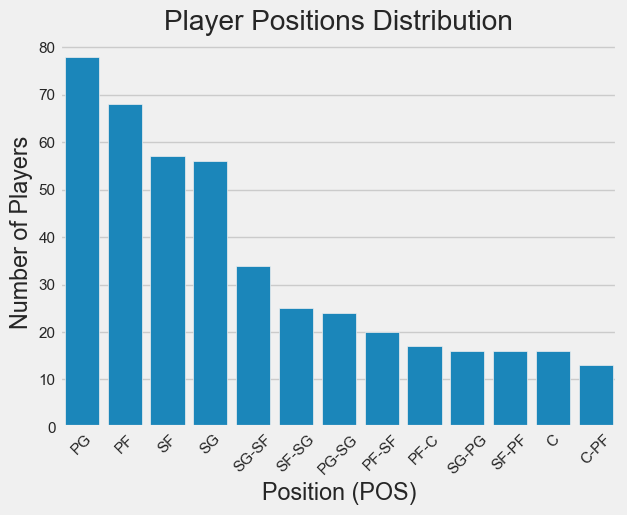

In [1240]:
#Grab counts of each position
pos_counts = NBA_merged['POS'].value_counts()

#Visualize counts with barchart
sns.barplot(data=pos_counts)
plt.title('Player Positions Distribution')
plt.xlabel('Position (POS)')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)

Looking at the barplot above, we can see the distribution of the players' positions. As you can see, most of our data appears to come from players who identify as one singular poistion (PG, SG, SF, PF) while there is less data on centers (C). There are also several players who play more than one position (i.e. SG-SF, PF-C, etc). From the plot of the distributions, I can conclude that the data is representative of the NBA as a whole, and not just for specific positions, whether it be guards, forwards, or centers.

In order to gain some further insights when it comes to NBA combine data and their correlations with actual, in-game performance statistics, I will create a heatmap. This will make it easier to get a birds-eye-view of some of the data and how they interact with eachother. In said heatmap, I will include combine data such as 'WNGSPN', 'STNDRCH', 'STNDVERT', 'LPVERT', 'LANE', 'SPRINT', and 'BENCH' and I will look at the correlations they have with several in-game statistics such as 'PPG', 'AVG_REB', 'AVG_AST', 'FG_PCT', '3P_PCT', 'FT_PCT', and 'win_shares'.

Text(0.5, 1.0, 'NBA Combine/In-Game Statistics Correlation Heatmap')

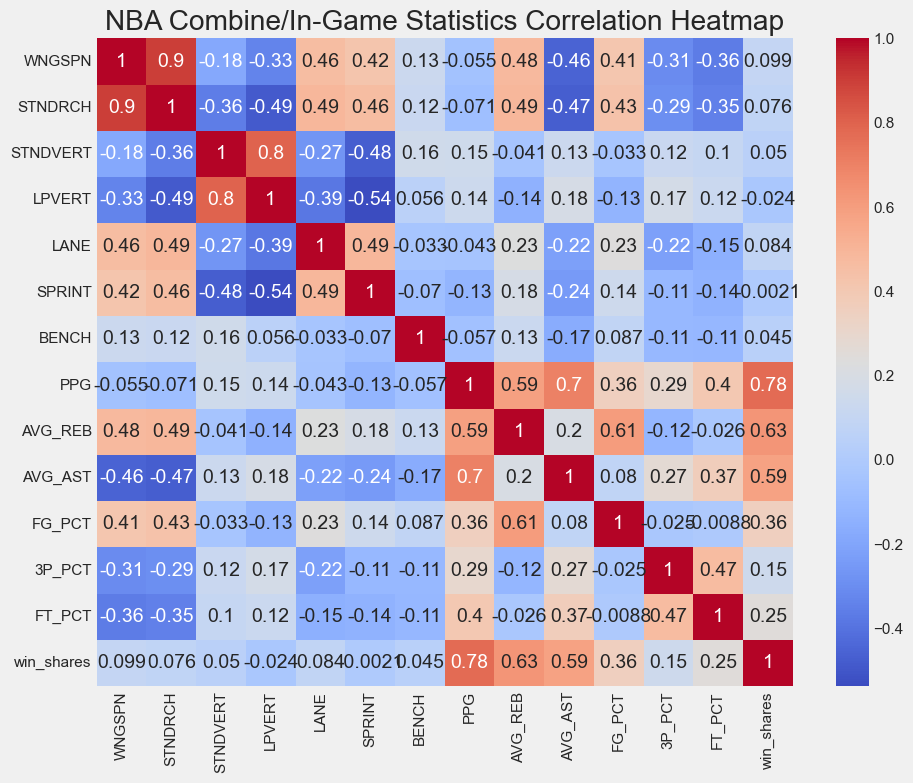

In [1244]:
selected = ['WNGSPN','STNDRCH', 'STNDVERT', 'LPVERT', 'LANE', 'SPRINT', 'BENCH', 'PPG', 'AVG_REB', 'AVG_AST', 'FG_PCT', 
'3P_PCT', 'FT_PCT', 'win_shares']
correlations = NBA_merged[selected].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('NBA Combine/In-Game Statistics Correlation Heatmap')

After looking at this heatmap, I did not expect there to be as many weak correlations between combine and in-game statistics as there appears to be. Regardless, there are still some interesting relationships present in the data, such as the correlation between wingspan ('WNGSPN') and average rebounds per game ('AVG_REB'), as well as standing reach ('STNDRCH') and average rebounds per game ('AVG_REB'). These are examples of some moderately positive correlations in the data. On the other hand, there is also some interesting negatively correlated relationships such as wingspan ('WNGSPN') and standing reach ('STNDRCH') with average assists per game ('AVG_AST'), as well as free throw percentage ('FT_PCT') and 3-point percentage ('3P_PCT') in relation to wingspan ('WNGSPN') and standing reach ('STNDRCH').

Let us visualize some of the more moderate correlations mentioned above, beginning with average rebounds per game in relation to wingspan and standing reach:

Text(0.5, 1.0, 'Standing Reach vs Average Rebounds Per Game')

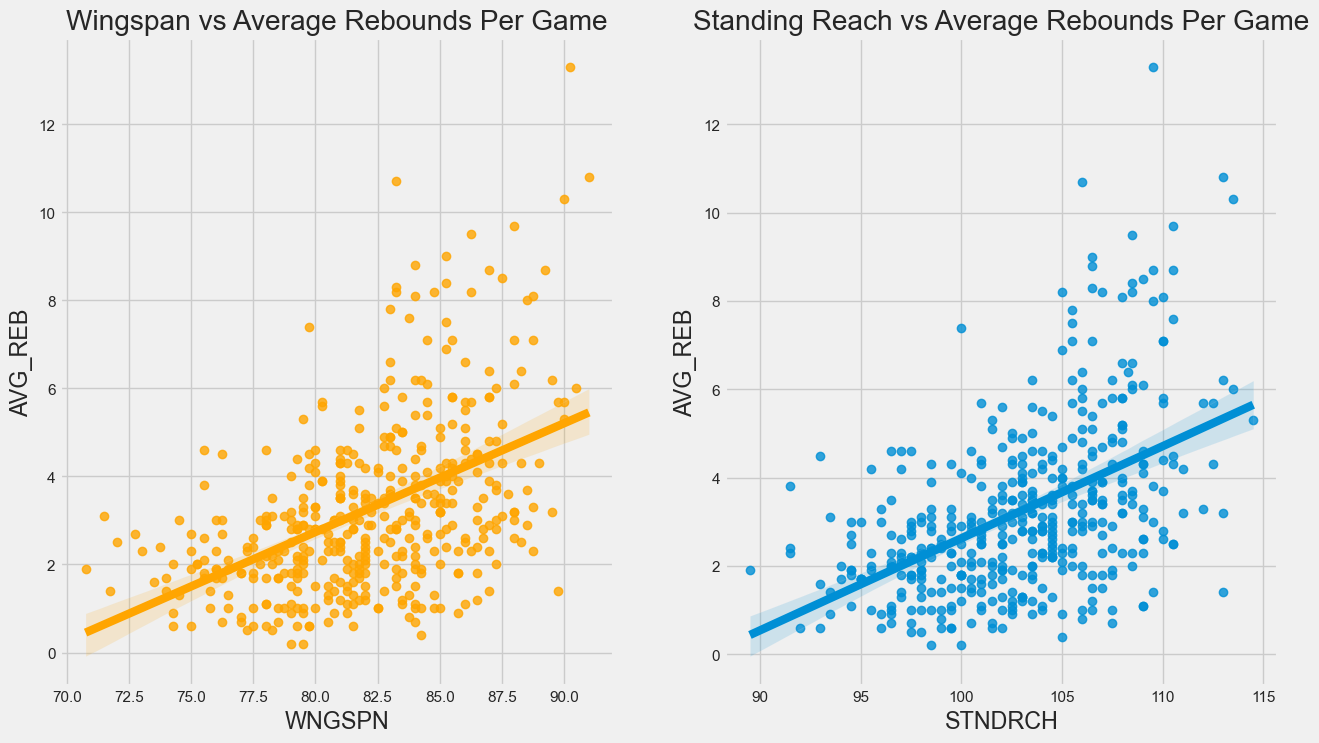

In [1248]:
#Create figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(14,8))
#Regplot for average rebounds per game in relation to wingspan
sns.regplot(data=NBA_merged, x='WNGSPN', y='AVG_REB', ax=axs[0], color='orange')
axs[0].set_title('Wingspan vs Average Rebounds Per Game')
#Regplot for average rebounds per game in relation to standing reach
sns.regplot(data=NBA_merged, x='STNDRCH', y='AVG_REB', ax=axs[1])
axs[1].set_title('Standing Reach vs Average Rebounds Per Game')

After taking a closer look at these two correlations, I can confidently conclude that a players' wingspan and standing reach are in fact both good predictors when it comes to rebounding ability on a game-to-game basis. Those with longer wingspans and standing reaches tend to grab more rebounds per game on average. This could be important for a teams draftroom because if they are lacking in rebounding categories, they can begin to look for players with longer wingspans and standing reaches as this appears to translate to NBA action.

Next, let us look at a negatively correlated relationship in the data with wingspan and standing reach in relation to shooting percentages, specifically freethrow and 3-point percentages:

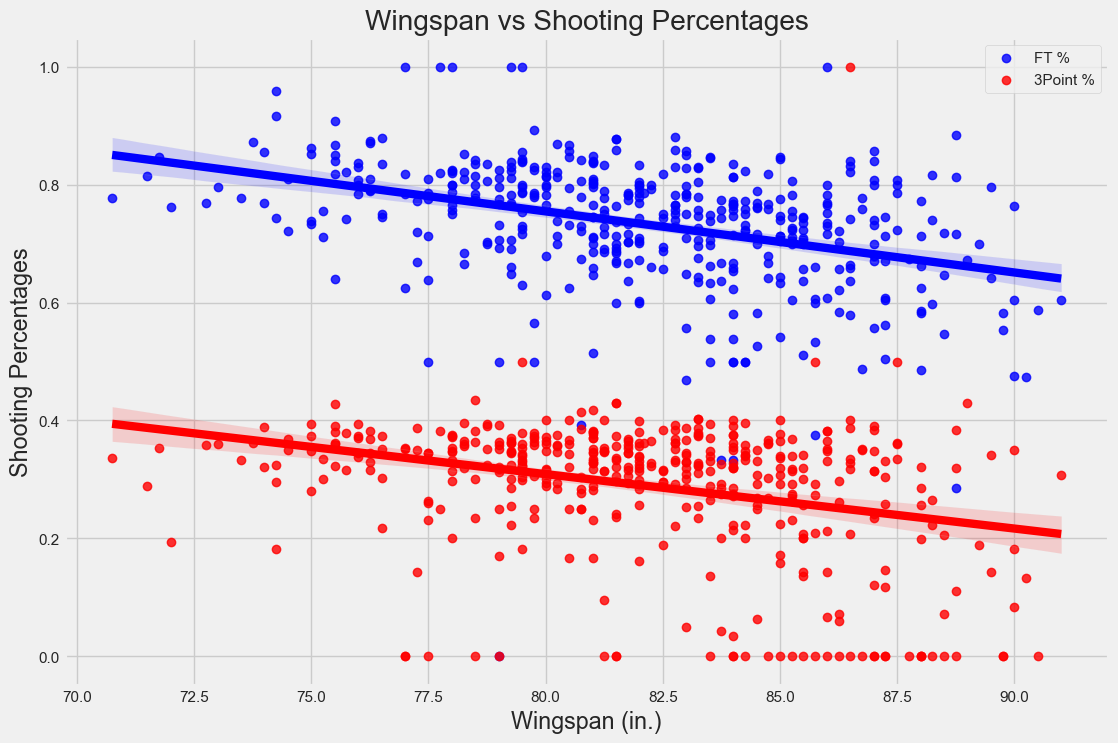

In [1252]:
#Regression plot for Wingspan vs Shooting Percentages
plt.figure(figsize=(12, 8))
sns.regplot(x='WNGSPN', y='FT_PCT', data=NBA_merged, color='blue', label='FT %')
sns.regplot(x='WNGSPN', y='3P_PCT', data=NBA_merged, color='red', label='3Point %')
plt.title('Wingspan vs Shooting Percentages')
plt.xlabel('Wingspan (in.)')
plt.ylabel('Shooting Percentages')
plt.legend()

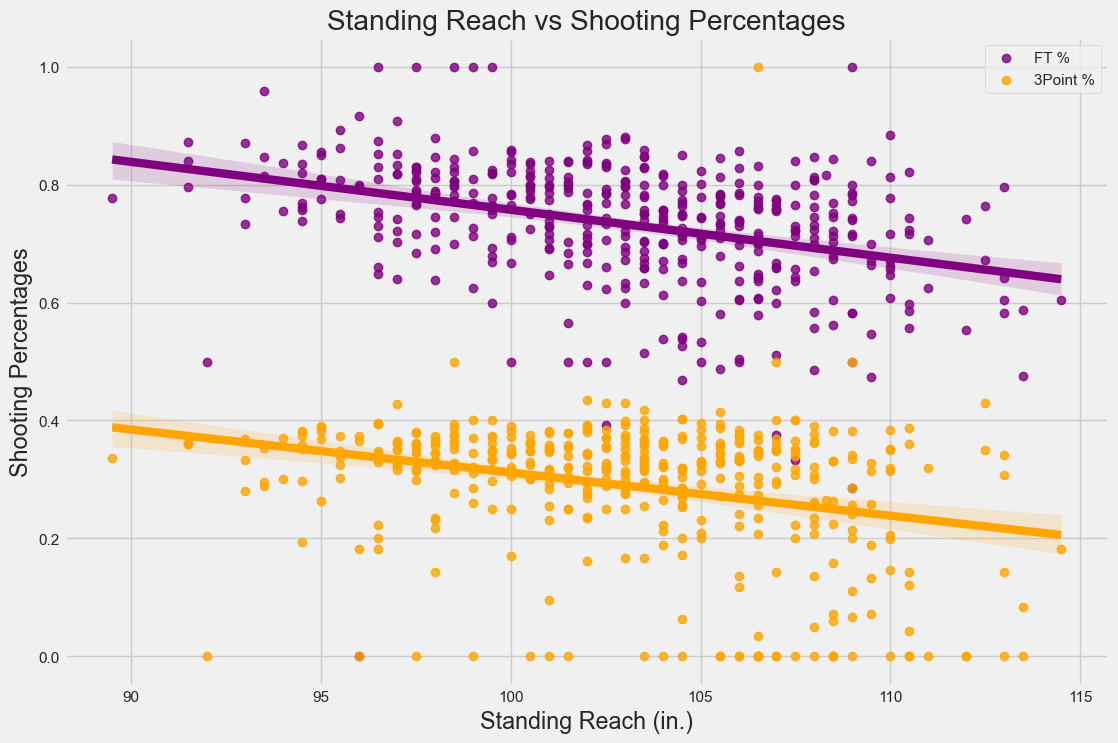

In [1254]:
#Regression plot for Standing Reach vs Shooting Percentages
plt.figure(figsize=(12, 8))
sns.regplot(x='STNDRCH', y='FT_PCT', data=NBA_merged, color='purple', label='FT %')
sns.regplot(x='STNDRCH', y='3P_PCT', data=NBA_merged, color='orange', label='3Point %')
plt.title('Standing Reach vs Shooting Percentages')
plt.xlabel('Standing Reach (in.)')
plt.ylabel('Shooting Percentages')
plt.legend()

It clearly appears that both wingspan as well as standing reach have a negative correlation with shooting perrcentages as a whole. In other words, those with longer arms or a longer wingspan and standing reach tend to shoot lower percentages from both the free throw line and behind the arc. I found this relationship particularly interesting as I am not sure why having shorter arms can help with shooting mechanics.

In [1257]:
#Descriptive statistics
NBA_merged.describe()

,YEAR,HGT,BMI,WNGSPN,STNDRCH,STNDVERT,LPVERT,LANE,SPRINT,BENCH,...,total_assists,FG_PCT,3P_PCT,FT_PCT,AVG_MIN,PPG,AVG_REB,AVG_AST,win_shares,BPM
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2009.295455,77.277841,25.118955,82.095682,103.013182,29.755227,35.150000,11.299659,3.262000,10.504545,...,900.370455,0.433461,0.289575,0.733211,19.314318,7.836136,3.254545,1.711818,20.442955,-1.905227
std,5.507831,3.281487,1.779055,3.862930,4.686107,2.844260,3.415295,0.516216,0.127912,5.230450,...,1324.201910,0.070896,0.116582,0.109912,7.972555,4.914452,1.986533,1.473021,27.997436,3.273020
min,2000.000000,67.750000,20.180000,70.750000,89.500000,23.000000,21.000000,9.650000,2.960000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.200000,0.000000,-1.600000,-25.500000
25%,2005.000000,75.000000,23.920000,79.500000,99.500000,28.000000,33.000000,10.947500,3.180000,7.000000,...,98.500000,0.404000,0.257000,0.684750,12.900000,3.900000,1.900000,0.700000,1.000000,-3.325000
50%,2009.000000,77.500000,24.995000,82.000000,103.500000,30.000000,35.000000,11.215000,3.250000,10.000000,...,366.500000,0.435000,0.324000,0.750000,19.300000,6.800000,2.900000,1.200000,10.000000,-1.650000
75%,2013.000000,79.750000,26.170000,85.000000,106.500000,31.500000,37.500000,11.682500,3.332500,14.000000,...,1158.000000,0.465000,0.360000,0.803250,25.300000,10.300000,4.200000,2.200000,27.650000,0.000000
max,2019.000000,84.750000,32.580000,91.000000,114.500000,39.500000,44.000000,12.870000,3.810000,26.000000,...,10977.000000,0.692000,1.000000,1.000000,36.800000,27.200000,13.300000,9.500000,198.900000,7.300000


Above are some descriptive statistics from the data in NBA_merged. It includes the counts, mean, standard deviation, minimum, maximum, as well as quartiles (25%, 50%, 75%). When looking at aspects like the ranges of the in-game data, it confirms my belief that even after narrowing the dataset down, it is still giving us an accurate and generalizable outlook on NBA Combine metrics and NBA Draft/in-game/career statistics. After completing some exploratory data analysis (EDA), I can say that there is a great amount of interesting relationships that can be drawn from the data, even just from a birds-eye view. According to distributions of players and their statistics, the data seems to be very generalizable, and thus insightful. The next section of this project will dive deeper into the data with inferential aspects.

## Part 2: Inference

In [1261]:
from sklearn.linear_model import LinearRegression

### Research Question:

Does a longer wingspan significantly impact a player's 3-point shooting percentage when also controlling for height, and strength (bench press)?

### Hypothesis:

A players wingspan along with height and strength (bench press) will have a significant impact on 3-point percentage.

### Analysis:

In order to analyze the relationship between a players wingspan and 3-point percentage when controlling for height and strength, I chose to create a multiple linear regression model that takes into account these predictors as well. The variables that will be added along with wingspan ('WNGSPN') include the players height in inches ('HGT') and their strength measured by bench press reps ('BENCH').

Before we do this, let us create a linear regression model for the relationship between just wingspan and 3-point percentage for comparison reasons:

In [1270]:
#Create linear regression model and fit a line to the relationship between wingspan and 3-point %
model = LinearRegression(fit_intercept=True)
wing_reg = model.fit(NBA_merged[['WNGSPN']], NBA_merged['3P_PCT'])

We can now extract some model statistics and create a plot for the relationship between wingspan ('WNGSPN') and 3-point percentage ('3P_PCT'):

In [1273]:
#Correlation coefficient and intercept
print('coefficient:', wing_reg.coef_[0])
print('intercept:', wing_reg.intercept_)

coefficient: -0.00923725084968847
intercept: 1.0479134066307543


Text(15.444444444444445, 0.5, '3-Point %')

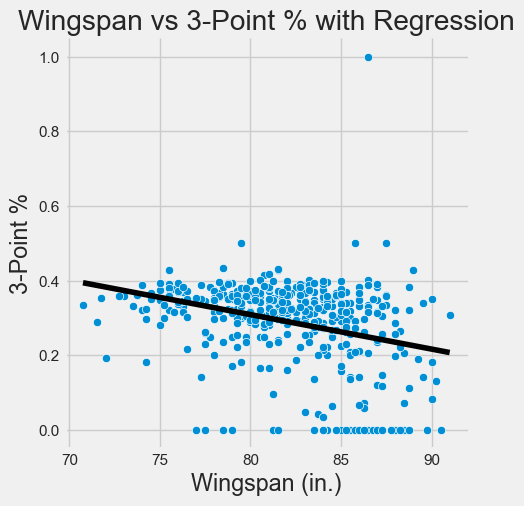

In [1275]:
#Create scatter plot with regression line for wingspan vs 3-point %
xs = np.linspace(np.min(NBA_merged['WNGSPN']), np.max(NBA_merged['WNGSPN']), 100)
b0 = wing_reg.intercept_
b1 = wing_reg.coef_
preds = b0 + b1*xs

sns.relplot(data=NBA_merged, x='WNGSPN', y='3P_PCT')
sns.lineplot(x=xs, y=preds, c='black')
plt.title('Wingspan vs 3-Point % with Regression')
plt.xlabel('Wingspan (in.)')
plt.ylabel('3-Point %')

We can now imprt statsmodels.api and look at summary statistics of the regression results:

In [1278]:
import statsmodels.api as sm

#Create fit model and print summary statistics using statmodels
X = NBA_merged[['WNGSPN']]
X = sm.add_constant(X)
sm_model = sm.OLS(NBA_merged['3P_PCT'], X).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 3P_PCT   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     45.27
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           5.38e-11
Time:                        23:43:12   Log-Likelihood:                 343.44
No. Observations:                 440   AIC:                            -682.9
Df Residuals:                     438   BIC:                            -674.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0479      0.113      9.288      0.0

From the OLS Regression Results, it appears that the R-squared value is 0.094 which indicates that only 9.4% of the variance in 3-point percentage can be explained by wingspan. The p-value of 0.000 also indicates that the coefficient for wingspan is statistically significant, and that the relationship between wingspan and 3-point percentage is unlikely to be due to chance.

Now, let use similar strategies for creating a regression model but with multiple predicting variable (multiple linear regression). First, I will begin by look at a pairplot in order to gain a better understanding about the correlations of the variables that we will be adding alongside wingspan in comparison to 3-point percentage:

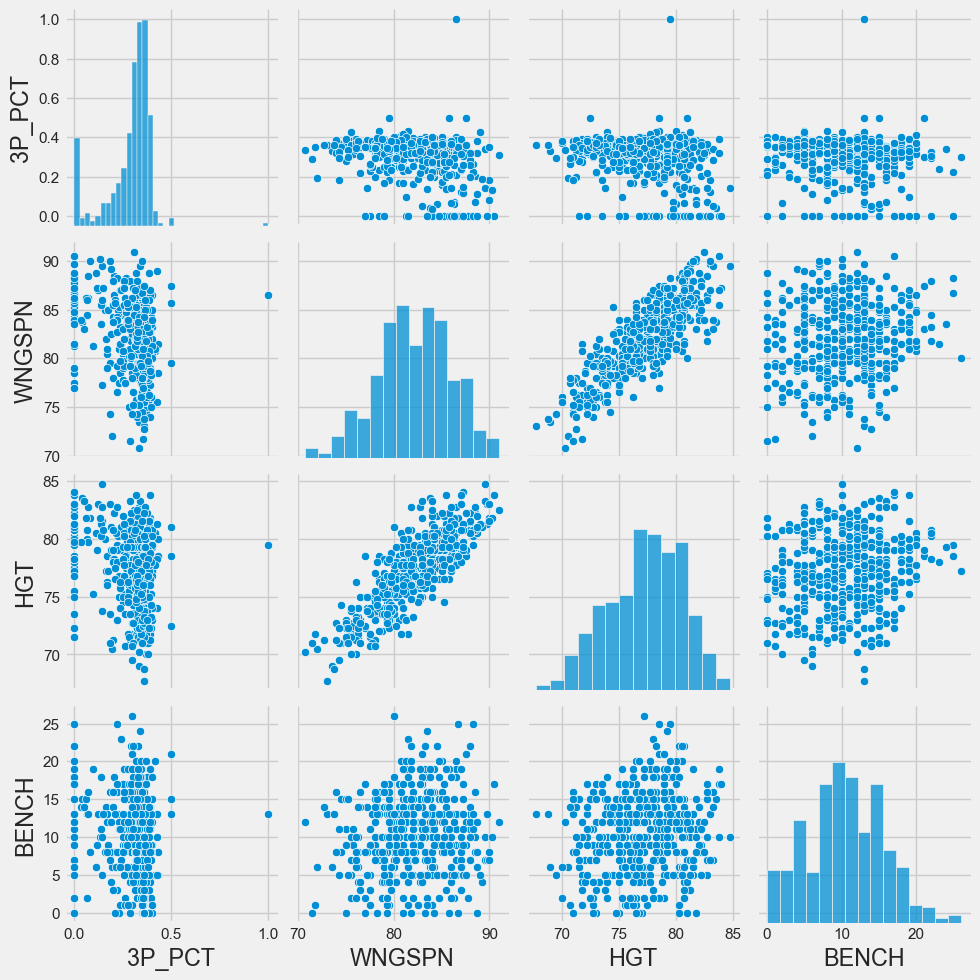

In [1282]:
sns.pairplot(NBA_merged[['3P_PCT', 'WNGSPN', 'HGT', 'BENCH']])

Looking at the far left side of the pairplot, we can see all of the newly included variables' relationships with 3-point percentage. It appears that they all have some sort of correlation with 3-point percentage, whether it be negative or positive, so it may be a good idea to see if adding these predictors will help create a better model.

I will now create a multiple linear regression model for the relationship between wingspan, height, and strength (bench press), when it comes to predicting 3-point percentage:

In [1286]:
#Create multiple linear regression model and fit a line to the relationship between wingspan, height, and strength in relation to 3-point %
model = LinearRegression()
mult_reg = model.fit(NBA_merged[['WNGSPN', 'HGT', 'BENCH']], NBA_merged['3P_PCT'])

In [1288]:
#Correlation coefficients and intercept
print('intercept:', mult_reg.intercept_)
print('WNGSPN coefficient:', mult_reg.coef_[0])
print('HGT coefficient:', mult_reg.coef_[1])
print('BENCH coefficient:', mult_reg.coef_[2])

intercept: 1.0727236553369086
WNGSPN coefficient: -0.0078568094358169
HGT coefficient: -0.0015773798106713686
BENCH coefficient: -0.0015461898657113027


In [1290]:
#Create fit model and print summary statistics using statmodels
X = NBA_merged[['WNGSPN', 'HGT', 'BENCH']]
X = sm.add_constant(X)
sm_model = sm.OLS(NBA_merged['3P_PCT'], X).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 3P_PCT   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     16.03
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           6.65e-10
Time:                        23:43:16   Log-Likelihood:                 344.82
No. Observations:                 440   AIC:                            -681.6
Df Residuals:                     436   BIC:                            -665.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0727      0.126      8.492      0.0

Now, looking at the summary statistics for the multiple linear regression model, we can see that the R-squared value increased very slightly from 0.094 or 9.4% to 0.099 or 9.9%. This means that the multiple linear regression model, adding player height and bench, increased the variance in 3-point percentage explained by about only 0.5%. This was a surprise to me as I previously believed that incorporating these two variables in would significantly increase this R-squared value. The p-values tell us that the height and bench variables are not statistically significant as height and benchs' p-values are 0.586 and 0.133 respectively. This suggests that they do not have a significant impact on 3-point percentage after accounting for wingspan.

Based on the models created and given my original hypothesis stating that a players wingspan, along with height and strength (bench press) will have a significant impact on 3-point percentage, I can confidently reject my original hypothesis. This is due to the fact that the p-values for the variables suggest that height and strength (bench press) do not have a significant impact on 3-point percentage after accounting for wingspan.

## Part 3: Prediction

### Target of Interest:

The target of interest that I would like to focus on and thought may be interesting to predict would be whether a player is a lottery pick or not. The NBA Draft Lottery is an annual event where a lottery is held and teams are assigned their draft position for the upcoming draft. There are only 14 picks out of the 60 total that are assigned by lottery (14 teams not in playoffs), thus if a player is selected in the top 14, they are considered a 'lottery pick'.  

### Prediction of Target:

In order to predict whether or not a player was a lottery pick in their draft year I chose to use a logistic regression model. I seek to seperate the variable 'overall_pick' into lottery (1-14) or not_lottery (15<=) to look at it in a binary manor for modeling sake. I will begin by taking the NBA_merged dataframe and adding a new column titled 'lottery pick' with values '0'(not a lottery pick) and '1'(lottery pick).

In [1299]:
#Add column 'lottery_pick' to NBA_merged '0 = not lottery pick, 1 = lottery pick'
NBA_merged['lottery_pick'] = np.where((NBA_merged['overall_pick'] >= 1) & (NBA_merged['overall_pick'] <= 14), 1, 0)
NBA_merged.head()

,YEAR,PLAYER,POS,HGT,WGT,BMI,WNGSPN,STNDRCH,STNDVERT,LPVERT,...,FG_PCT,3P_PCT,FT_PCT,AVG_MIN,PPG,AVG_REB,AVG_AST,win_shares,BPM,lottery_pick
0,2000,Eddie House,SG-PG,71.75,176.5,24.10,75.50,95.0,29.5,38.5,...,0.409,0.390,0.851,17.3,7.5,1.7,1.6,20.0,0.0,0
1,2000,Jason Hart,PG,73.75,181.0,23.39,78.00,97.5,29.5,33.5,...,0.417,0.315,0.788,15.5,4.8,1.7,2.3,8.6,-1.2,0
2,2000,A.J. Guyton,PG-SG,72.75,175.0,23.24,75.75,97.5,33.0,37.5,...,0.377,0.378,0.822,15.6,5.5,1.0,1.8,0.3,-2.9,0
3,2000,Khalid El-Amin,PG,69.00,200.0,29.53,73.50,93.0,27.5,32.0,...,0.370,0.333,0.778,18.7,6.3,1.6,2.9,0.6,-2.4,0
4,2000,Speedy Claxton,PG,70.50,166.0,23.48,72.00,94.5,36.0,42.5,...,0.409,0.193,0.762,25.6,9.3,2.5,4.3,14.2,-0.3,0


Now that we have this binary 'lottery_pick' column, I decided to choose a players points per game ('PPG') to predict whether a player was a lottery pick or not in their respective drafts. First, let us visualize the association between the two using a jointplot:

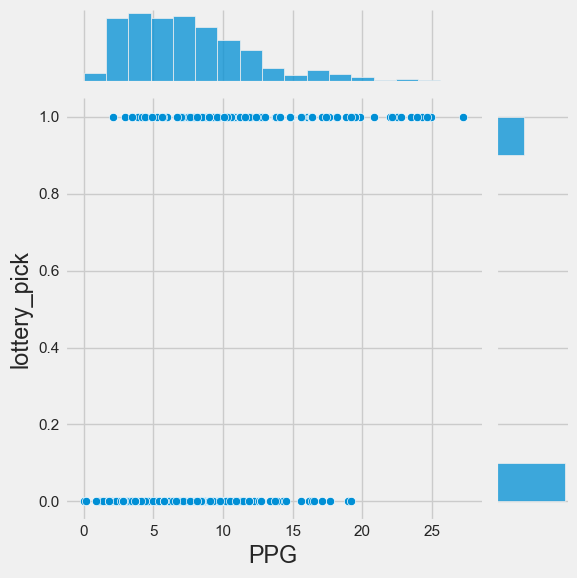

In [1302]:
#Jointplot of PPG vs lottery_pick
sns.jointplot(data=NBA_merged, x='PPG', y='lottery_pick')

Based off of the jointplot above, I would say that it may be intuitive to try and model the probability of being a lottery pick, given a players points per game. In order to do this, I will first create a similar plot to above, but with a regression line further highlighting the relationship, as well as jittering the data in order to better see points.

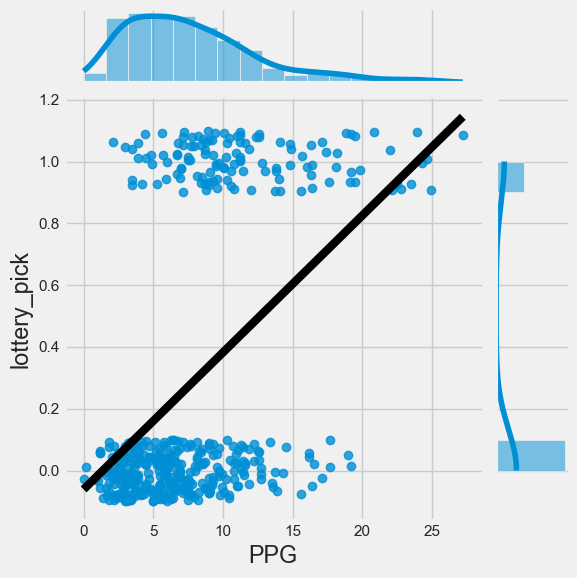

In [1305]:
#Jittered jointplot of PPG vs lottery_pick with regression line
sns.jointplot(data=NBA_merged, x='PPG', y='lottery_pick', y_jitter=0.1, kind='reg', ci=False, joint_kws={'line_kws':{'color':'black'}})

We can see that this appears to be a more understandable model than the previous, but it still has some issues. It is very bias to outliers and can completley throw off the regression lines fit with even just a single outlier. In order to protect against this bias, and to make the model model more representable, I will create a graph of averages. I will do this by binning the x-values ('PPG') and taking the average y-value for each bin.

In [1308]:
#Split x-axis into 20 bins
bins = pd.cut(NBA_merged['PPG'], 20)
bins

0        (6.8, 8.16]
1       (4.08, 5.44]
2        (5.44, 6.8]
3        (5.44, 6.8]
4       (8.16, 9.52]
           ...      
435      (6.8, 8.16]
436     (2.72, 4.08]
437     (1.36, 2.72]
438    (9.52, 10.88]
439    (13.6, 14.96]
Name: PPG, Length: 440, dtype: category
Categories (20, interval[float64, right]): [(-0.0272, 1.36] < (1.36, 2.72] < (2.72, 4.08] < (4.08, 5.44] ... (21.76, 23.12] < (23.12, 24.48] < (24.48, 25.84] < (25.84, 27.2]]

In [1310]:
#Create new column 'bin' with midpoint of each bin range
NBA_merged['bin'] = [(x.left + x.right) / 2 for x in bins]
NBA_merged['bin']

0       7.48
1       4.76
2       6.12
3       6.12
4       8.84
       ...  
435     7.48
436     3.40
437     2.04
438    10.20
439    14.28
Name: bin, Length: 440, dtype: float64

Now that we know which bin each player belongs in, we can plot the average 'lottery_pick' for each bin.

In [1313]:
#Average lottery pick rate for each bin
lottery_by_bin = NBA_merged.groupby('bin')['lottery_pick'].mean()
lottery_by_bin

bin
0.6664     0.000000
2.0400     0.025000
3.4000     0.090909
4.7600     0.136364
6.1200     0.118644
7.4800     0.312500
8.8400     0.456522
10.2000    0.424242
11.5600    0.413793
12.9200    0.384615
14.2800    0.642857
15.6400    0.625000
17.0000    0.625000
18.3600    0.500000
19.7200    0.857143
21.0800    1.000000
22.4400    1.000000
23.8000    1.000000
25.1600    1.000000
26.5200    1.000000
Name: lottery_pick, dtype: float64

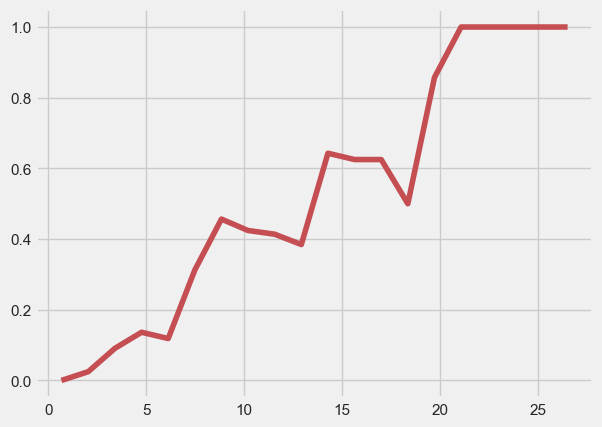

In [1315]:
#Plot lottery pick rate by bin
plt.plot(lottery_by_bin, 'r')

We can now add this line drawn from the graph of averages to the previous model we visualized:

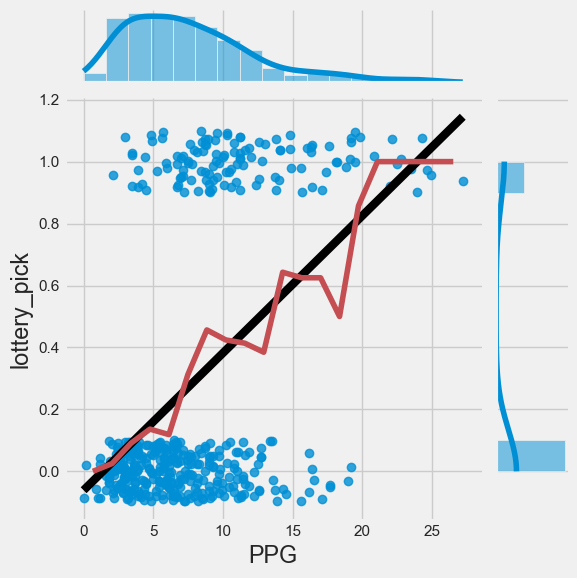

In [1318]:
sns.jointplot(data=NBA_merged, x='PPG', y='lottery_pick', y_jitter=0.1, kind='reg', ci=False, joint_kws={'line_kws':{'color':'black'}})
plt.plot(lottery_by_bin, 'r')

I will also take a look at the odds of a player being a lottery pick given different points per game values:

In [1321]:
odds_by_bin = lottery_by_bin / (1 - lottery_by_bin)
odds_by_bin

bin
0.6664     0.000000
2.0400     0.025641
3.4000     0.100000
4.7600     0.157895
6.1200     0.134615
7.4800     0.454545
8.8400     0.840000
10.2000    0.736842
11.5600    0.705882
12.9200    0.625000
14.2800    1.800000
15.6400    1.666667
17.0000    1.666667
18.3600    1.000000
19.7200    6.000000
21.0800         inf
22.4400         inf
23.8000         inf
25.1600         inf
26.5200         inf
Name: lottery_pick, dtype: float64

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


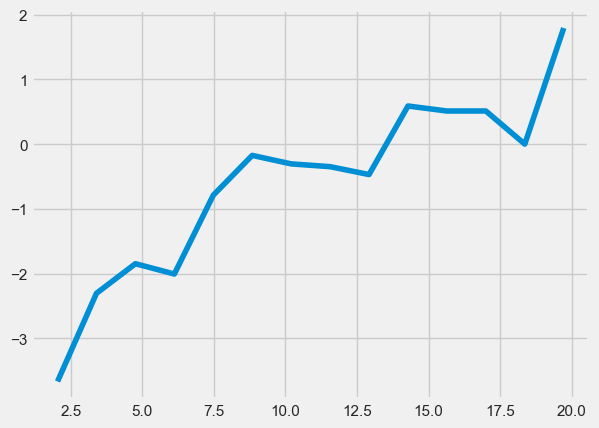

In [1323]:
plt.plot(np.log(odds_by_bin))

Before looking at the odds, we had now obtained a graph that represents the proportion of times a player is a lottery pick, given the amount of points they score per game ('PPG'). In a logistic regression model, we want to model the probability of an observation belonging to class 1, which in this case, is a player being a lottery pick. The next step I will take will be to choose a loss function.

I will begin by choosing squared loss. In order to implement this, I will first create a function that calculates sigma, followed by a function that calculates mean squared error for points per game and lottery pick status.

In [1327]:
#Function that calculates sigma
def sigma(t):
    return 1 / (1 + np.exp(-t))

In [1329]:
#Function that calculates mean squared error for points per game and lottery pick status
def mse_loss_nba(theta):
    x = NBA_merged['PPG']
    y_obs = NBA_merged['lottery_pick']
    y_hat = sigma(x * theta)
    return np.mean((y_obs - y_hat)**2)

Now that we have a function that calculates our mean squared error, I can now plot said error.

Text(0, 0.5, 'MSE')

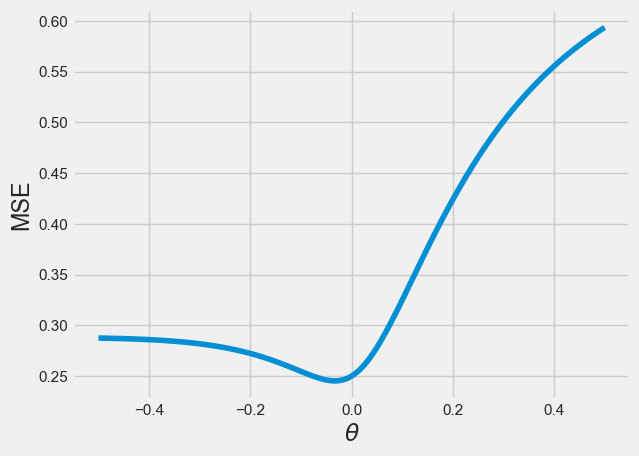

In [1332]:
#Plot mean squared error loss for the NBA_merged 'PPG' and 'lottery_pick'
thetas = np.linspace(-.5, .5, 100)
plt.plot(thetas, [mse_loss_nba(theta) for theta in thetas])
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')

Next, we will minimize the loss and derive the 'best theta', or the value of theta with the lowest mean squared error.

In [1335]:
#Use minimize function to minimize mse loss
best_theta_mse = minimize(mse_loss_nba, x0=0)['x'][0]
best_theta_mse

-0.033055668432886966

I can now plot this loss function with my previously plotted graph of averages.

Text(0, 0.5, 'lottery_pick')

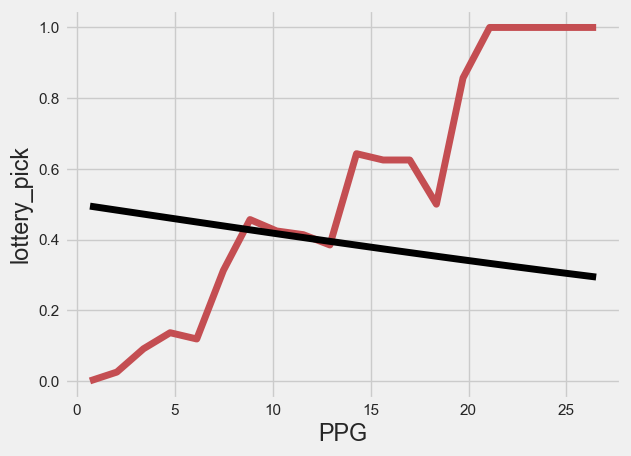

In [1338]:
#Plot mse loss function with graph of averages
plt.plot(lottery_by_bin, 'r', linewidth=5)
x = lottery_by_bin.index
plt.plot(x, sigma(x * best_theta_mse), 'black', linewidth=5)
plt.xlabel('PPG')
plt.ylabel('lottery_pick')

Looking at this graph, it appears that with this minimized value of theta, we are not fitting the model very well. I am very riddled by why the minimized mean square error is a negative value. I have read through and re-ran my code countless times and continue to get this negative value. Due to this not being a great function for loss, I will now attempt to use entropy loss instead. I will begin the same way I did before, but with steps for entropy loss instead.

In [1341]:
#Cross entropy function
def cross_entropy(y, yhat):
    return -y * np.log(yhat) - (1 - y) * np.log(1 - yhat)

In [1343]:
#Function for mean cross entropy loss
def mce_loss_nba(theta):
    x = NBA_merged['PPG']
    y_obs = NBA_merged['lottery_pick']
    y_hat = sigma(theta * x)
    return np.mean(cross_entropy(y_obs, y_hat))

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'MCE')

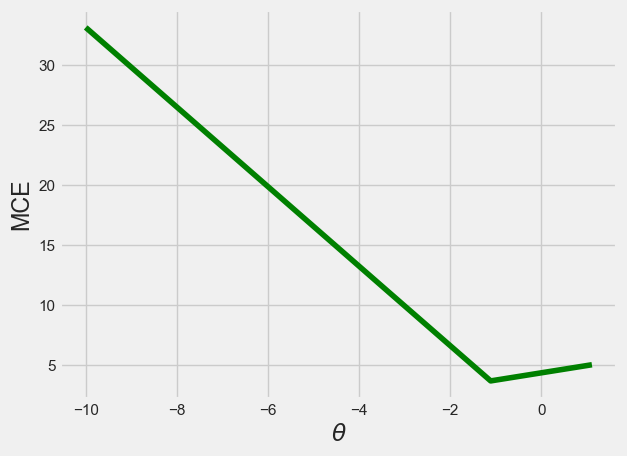

In [1345]:
#Plot mean cross entropy loss for the NBA_merged 'PPG' and 'lottery_pick'
thetas = np.linspace(-10, 10, 10)
plt.plot(thetas, [mce_loss_nba(theta) for theta in thetas], color='green')
plt.xlabel(r'$\theta$')
plt.ylabel('MCE')

In [1346]:
#Use minimize function to minimize mce loss
best_theta_mce = minimize(mce_loss_nba, x0=0)['x'][0]
best_theta_mce

-0.028781411046084372

Text(0, 0.5, 'lottery_pick')

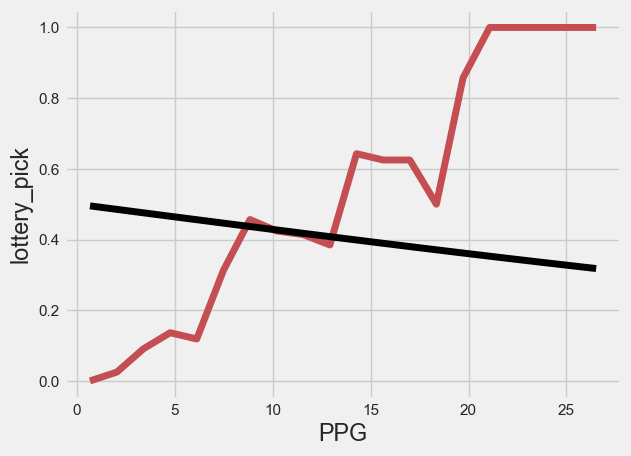

In [1349]:
#Plot mce loss function with graph of averages
plt.plot(lottery_by_bin, 'r', linewidth=5)
x = lottery_by_bin.index
plt.plot(x, sigma(x * best_theta_mce), 'black', linewidth=5)
plt.xlabel('PPG')
plt.ylabel('lottery_pick')

Even when using a different loss function (cross entropy instead of squared error) I continue to get the same plot. Once again, I do not belive this is correct and have tirelessly gone over my code and compared using lectures and homeworks yet still I cannot figure out what the issue is. I have changed the values of theta to what I belive they should be, and I get a graph like the one below. I will continue to play with my code until the project is due (I apologize).

Text(0, 0.5, 'lottery_pick')

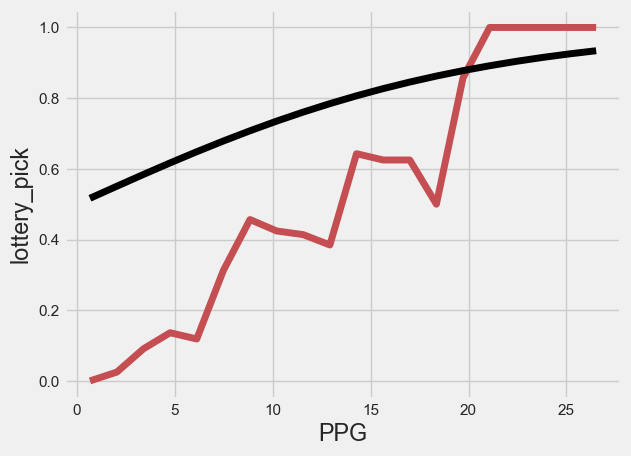

In [1352]:
#Plot mce loss function with graph of averages with my best theta (0.1)
plt.plot(lottery_by_bin, 'r', linewidth=5)
x = lottery_by_bin.index
plt.plot(x, sigma(x * 0.1), 'black', linewidth=5)
plt.xlabel('PPG')
plt.ylabel('lottery_pick')

Using this instead, it appears that the model is capturing the overall trend of the data, but is not fitting perfectly to the discrete nature of the graph of averages plotted under it. This may be due to the model overfitting the data, specifically in the lower ranges for points per game ('PPG'). Possible ways to improve this may be by using a more complex model that takes more than just points per game into account when predicting whether a player is a lottery pick or not (multiple logistic regression).

We can now predict probabilities. To do this, I will create a function that predicts the probability of a player being a lottery pick given several values of points per game.

In [1358]:
#Function to predict probabilities
def predict_probabilities(X, theta):
    return sigma(X * theta)

In [1360]:
#Predicted probabilities
predict_probabilities(NBA_merged['PPG'], 0.1)

0      0.679179
1      0.617748
2      0.634136
3      0.652489
4      0.717075
         ...   
435    0.692110
436    0.569546
437    0.544879
438    0.727108
439    0.797380
Name: PPG, Length: 440, dtype: float64

Above are the predicted probabilities of each player being a lottery pick given how many points they score per game. Once again, these may not be the most accurate predictions as I decided to use my own value of theta that I believe fit the best, rather than the minimized theta as I believed that this theta was not near the best fit.

After completing this section, I can say that it did not go as expected. I am disappointed with the way that my last logistic regression model turned out, but sadly I have now ran out of time. Although, I still can say that I learned a great amount when it comes to exploratory data analysis (EDA), inference models (linear regression/multiple linear regression), and predictive models (logistic regression) and how to implement these models. Being able to do this with data that really interests me has been the most fun when completing this project and I will continue to look into similar data, and use the skills I have learned to better uncover insights from the game I love.